## My first TensorFlow program 
The objective of this program is to understand its tensorflow's computational graph,runtime and other concepts.
* Tensorflow is made of tensors and computational graph.
* Tensors are typed multi dimemsional arrays.
* Computational graph is made of nodes and edges.It determines what a program does in runtime.
* Nodes represent operation to be performed and edges represent the interface thorugh which a node obtains or produces the data.

The idea is to combine different operations(represented by nodes) in a some fashion(via edges) to achive the desired results.

### As a simple exercise, I'm trying to model a simple stright line to fit randomly generated dataset.

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import operator

%matplotlib inline

### Placeholders, Variables and Constants
Tensorflow uses three different ways to store data.
* Constants
    * Their value is fixed and coupled with a datatype
    * Ex:
    ```
    constant1 = tf.constant(2.0,dtype=tf.float32,name="constant1")
    constant2 = tf.constant([2. 3. 5.],dtype=tf.float32,name="constant2")
    ```
* Placeholders
    * Used to feed actual training examples
    * Can be fed at runtime
    * Ex:
    ```
    images_placeholder = tf.placeholder(tf.float32, shape=(batch_size, IMAGE_PIXELS),name="input")
    ```
* Variables
    * Used for trainable data such as weights/parameters and bias.
    * Should be initialised (usually intialised randomly)
    * Ex:
    ```
    biases = tf.Variable(tf.zeros([hidden1_units]), name='biases')
    ```

### Data
I'm building a simple linear model which will be able to predict the output based on input with minimum error.
It is basically a mapping between different 'x' values to 'Y' values.

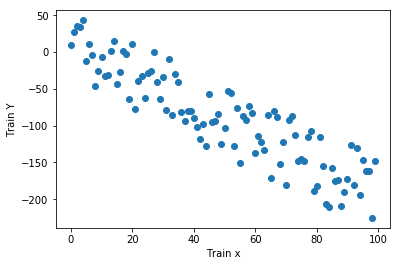

In [64]:
ops = {"+":operator.add,"-":operator.sub}
train_x = np.arange(100)
noise = np.random.uniform(-50,50, size=(100,))
train_Y = ops[random.choice("+-")](ops[random.choice("+-")](random.randint(-10,10) * train_x , random.randint(-10,10)),noise)
plt.scatter(train_x,train_Y)
plt.xlabel("Train x")
plt.ylabel("Train Y")

By observing the pattern we can see that a stright line could be the best model to fit this data.(Or we can call it cheating,since we generated 'Y' as a linear combination of 'x' and some other things)

My model is Y = mx + c or as Y = Wx + b
W -> the weights
b -> the bias

W and b: They are the trainable varibles, so they are declared as tensorflow variables.
x and Y: They are the data input to the system,so they are placeholders

In [56]:
W = tf.Variable(6.5, dtype=tf.float32,name="weight")
b = tf.Variable(0.03, dtype=tf.float32,name="bias")

x = tf.placeholder(tf.float32,name="x")
Y = tf.placeholder(tf.float32,name="Y")

In [57]:
prediction = W*x + b
error = prediction - Y
cost = tf.reduce_mean(tf.square(error))/(2*100)

Fitting the model to a striaght is a process of finding the values of 'W' and 'b', which gives the least possible cost.
I'm using gradient descent for optimisation.
Tensorflow has inbuilt construct called 'GradientDescentOptimiser'.
I just have to tell the optimiser which variable to minimize, which is in our case 'cost'.

Using 0.01 as the learning rate, the step size to be taken while descending.

In [58]:
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

### Little intro to Tensorflow's runtime.
We have defined our computational graphs using prediction,error and cost.Now its time to pass this graph to Tensorflow's runtime. The runtime can be different on different machines based on host machine's capability.
This feature provides the modularity and portability for tensorflow.

We interact with Tensorflow using a session. All varibles are initialized by 'global_variable_initializer'

In [59]:
session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

To train, we just need to run optimiser in the session repeatedly. The tensorflow knows to alter the values of Tensorflow Variables(in our case W and b) to minimize the cost

In [60]:
for i in range(100):
    session.run(optimizer,feed_dict={x:train_x,Y:train_Y})

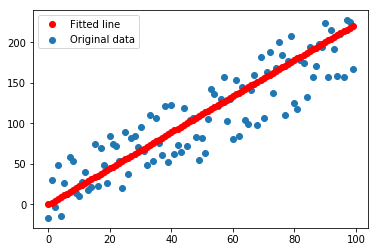

In [61]:
plt.scatter(train_x, train_Y, label='Original data')
plt.plot(train_x, session.run(W)*train_x + session.run(b),'ro', label='Fitted line')
plt.legend()